# Neural Networks and Deep Learning Spring 1400 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## Homework 2 - Question 2
### By Omid Vaheb

## Importing

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import itertools
from sklearn.metrics import confusion_matrix , classification_report
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense
import matplotlib.pyplot as plt

drive.mount('/content/drive/')

Mounted at /content/drive/


## Reading CSV file

In [ ]:
dataframe = pd.read_csv('/content/drive/My Drive/sonar.all-data.csv')

## Observing Dataset

In [ ]:
dataframe.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,0.1786,0.0658,0.0513,0.3752,0.5419,0.5440,0.5150,0.4262,0.2024,0.4233,0.7723,0.9735,0.9390,0.5559,0.5268,0.6826,0.5713,0.5429,0.2177,0.2149,0.5811,0.6323,0.2965,0.1873,0.2969,0.5163,0.6153,0.4283,0.5479,0.6133,0.5017,0.2377,0.1957,0.1749,0.1304,0.0597,0.1124,0.1047,0.0507,0.0159,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,0.2802,0.3086,0.2657,0.3801,0.5626,0.4376,0.2617,0.1199,0.6676,0.9402,0.7832,0.5352,0.6809,0.9174,0.7613,0.8220,0.8872,0.6091,0.2967,0.1103,0.1318,0.0624,0.0990,0.4006,0.3666,0.1050,0.1915,0.3930,0.4288,0.2546,0.1151,0.2196,0.1879,0.1437,0.2146,0.2360,0.1125,0.0254,0.0285,0.0178,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,0.1156,0.1654,0.3833,0.3598,0.1713,0.1136,0.0349,0.3796,0.7401,0.9925,0.9802,0.8890,0.6712,0.4286,0.3374,0.7366,0.9611,0.7353,0.4856,0.1594,0.3007,0.4096,0.3170,0.3305,0.3408,0.2186,0.2463,0.2726,0.1680,0.2792,0.2558,0.1740,0.2121,0.1099,0.0985,0.1271,0.1459,0.1164,0.0777,0.0439,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.01

In [ ]:
dataframe.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.068

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       208 non-null    float64
 1   2       208 non-null    float64
 2   3       208 non-null    float64
 3   4       208 non-null    float64
 4   5       208 non-null    float64
 5   6       208 non-null    float64
 6   7       208 non-null    float64
 7   8       208 non-null    float64
 8   9       208 non-null    float64
 9   10      208 non-null    float64
 10  11      208 non-null    float64
 11  12      208 non-null    float64
 12  13      208 non-null    float64
 13  14      208 non-null    float64
 14  15      208 non-null    float64
 15  16      208 non-null    float64
 16  17      208 non-null    float64
 17  18      208 non-null    float64
 18  19      208 non-null    float64
 19  20      208 non-null    float64
 20  21      208 non-null    float64
 21  22      208 non-null    float64
 22  23

In [ ]:
x = dataframe.drop('Class', inplace=False, axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataframe2 = pd.DataFrame(x_scaled)
dataframe2['Class'] = dataframe['Class']

In [ ]:
dataframe2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.204011,0.162180,0.139068,0.114342,0.173732,0.253615,0.320472,0.285114,0.252485,0.281652,0.293652,0.332094,0.366929,0.277682,0.318088,0.368702,0.394864,0.430980,0.479078,0.532370,0.587964,0.615862,0.625914,0.664639,0.667442,0.669420,0.687105,0.685080,0.636845,0.553561,0.497303,0.447810,0.388029,0.404911,0.378717,0.379887,0.359399,0.313359,0.304343,0.326260,0.293285,0.332959,0.318818,0.275799,0.280398,0.220284,0.221755,0.273807,0.262135,0.247564,0.160047,0.180031,0.265172,0.290669,0.197061,0.200555,0.213642,0.175035,0.216015,0.136425
std,0.169550,0.141277,0.126242,0.110623,0.140888,0.158843,0.167175,0.187767,0.175311,0.192215,0.188153,0.205264,0.202911,0.169614,0.206066,0.236770,0.273212,0.271719,0.271395,0.281092,0.271731,0.261612,0.265101,0.244971,0.250949,0.261293,0.258070,0.244122,0.243760,0.235165,0.233234,0.239538,0.216857,0.245089,0.265043,0.266251,0.262314,0.221455,0.209861,0.194620,0.198160,0.206017,0.179741,0.171722,0.215565,0.183678,0.157466,0.186932,0.181494,0.165637,0.119607,0.137432,0.183385,0.213474,0.160717,0.147080,0.164361,0.148051,0.170286,0.116190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087389,0.067938,0.057326,0.044163,0.079508,0.152714,0.209957,0.165215,0.132571,0.142964,0.142280,0.161013,0.212646,0.152496,0.162027,0.183289,0.177132,0.212545,0.262650,0.305035,0.367332,0.393646,0.417426,0.529480,0.514139,0.497935,0.508247,0.521176,0.455864,0.372963,0.324087,0.270726,0.220703,0.208135,0.160658,0.147530,0.136672,0.141390,0.144292,0.190359,0.147192,0.187179,0.200698,0.163457,0.134312,0.094007,0.116353,0.135145,0.133014,0.140000,0.083914,0.092368,0.118831,0.127924,0.080499,0.102564,0.096591,0.075515,0.098485,0.057737
50%,0.157080,0.129447,0.107753,0.090942,0.141517,0.220236,0.280438,0.235061,0.214349,0.244673,0.277754,0.330378,0.353462,0.261730,0.279466,0.293609,0.283390,0.343688,0.405586,0.510381,0.597070,0.657397,0.681784,0.691118,0.714242,0.729596,0.732745,0.724063,0.676136,0.581496,0.481907,0.437205,0.360706,0.349603,0.297075,0.315675,0.296523,0.285328,0.259751,0.290142,0.258830,0.292430,0.287793,0.228936,0.210407,0.166415,0.184082,0.233902,0.225644,0.216970,0.138446,0.151213,0.235065,0.242690,0.156463,0.165385,0.160511,0.125858,0.173554,0.108545
75%,0.251106,0.202958,0.185447,0.139563,0.237319,0.333042,0.407738,0.361852,0.334555,0.368082,0.386715,0.450835,0.479128,0.370089,0.451224,0.528725,0.647109,0.666545,0.717442,0.795939,0.807098,0.828213,0.839541,0.869045,0.870620,0.883027,0.912911,0.897360,0.849964,0.717881,0.647139,0.606493,0.533892,0.609353,0.584075,0.552949,0.528974,0.418270,0.419355,0.449510,0.407093,0.462332,0.419662,0.350103,0.329187,0.274787,0.279654,0.359689,0.3459

In [ ]:
dataframe = dataframe2

In [ ]:
X = dataframe.drop('Class', inplace = False, axis = 1)

In [ ]:
y = dataframe['Class']
temp = []
for i in range(len(y)):
    if y[i] == 'R':
        temp.append(1)
    else:
        temp.append(0)
y = temp
y = pd.Series(y)

## Train and Test Spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

## Preprocess:

In [ ]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (166, 60) (166,)
Testing data shape :  (42, 60) (42,)


In [ ]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

## Model Definition

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))	#Hidden Layer 1
model.add(Dense(512, activation = 'relu'))	#Hidden Layer 2
model.add(Dense(2, activation = 'softmax')) #Last layer with one output per class
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


## Fitting Model to Train Set

In [ ]:
history = model.fit(X_train, Y_train, epochs = 18, batch_size = 32, validation_split = 0.2) 	

Epoch 1/18
5/5 [==============================] - 1s 85ms/step - loss: 0.6930 - accuracy: 0.5497 - val_loss: 0.6775 - val_accuracy: 0.5294
Epoch 2/18
5/5 [==============================] - 0s 14ms/step - loss: 0.6381 - accuracy: 0.5677 - val_loss: 0.5476 - val_accuracy: 0.7941
Epoch 3/18
5/5 [==============================] - 0s 13ms/step - loss: 0.6132 - accuracy: 0.6599 - val_loss: 0.5526 - val_accuracy: 0.6765
Epoch 4/18
5/5 [==============================] - 0s 12ms/step - loss: 0.5467 - accuracy: 0.7595 - val_loss: 0.5570 - val_accuracy: 0.7059
Epoch 5/18
5/5 [==============================] - 0s 12ms/step - loss: 0.4656 - accuracy: 0.7224 - val_loss: 0.5066 - val_accuracy: 0.7353
Epoch 6/18
5/5 [==============================] - 0s 13ms/step - loss: 0.4425 - accuracy: 0.8508 - val_loss: 0.4753 - val_accuracy: 0.7647
Epoch 7/18
5/5 [==============================] - 0s 13ms/step - loss: 0.4223 - accuracy: 0.7714 - val_loss: 0.4514 - val_accuracy: 0.8235
Epoch 8/18
5/5 [===========

## Ploting Results

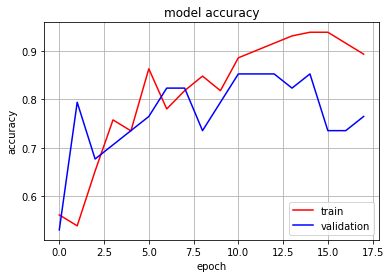

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

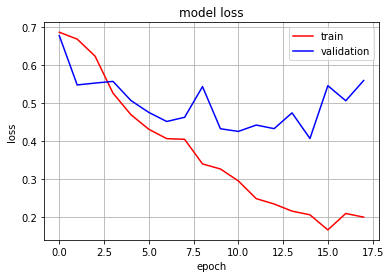

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

## Prediction on Test Set

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)

In [ ]:
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 8ms/step - loss: 0.3263 - accuracy: 0.8571
Test Loss 0.32633528113365173
Test Accuracy 0.8571428656578064


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[26  1]
 [ 5 10]]


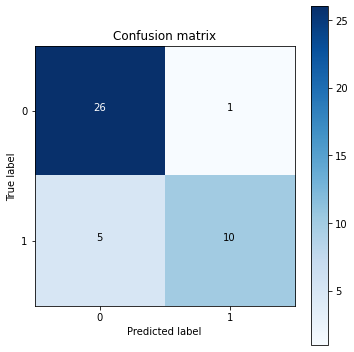

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_mtx, class_names)    

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.91      0.67      0.77        15

    accuracy                           0.86        42
   macro avg       0.87      0.81      0.83        42
weighted avg       0.86      0.86      0.85        42



## Mean Squared Error as Loss Function

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 25, batch_size = 32, validation_split = 0.2) 	

Epoch 1/25
5/5 [==============================] - 1s 52ms/step - loss: 0.2617 - accuracy: 0.5495 - val_loss: 0.2321 - val_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 0s 11ms/step - loss: 0.2275 - accuracy: 0.5845 - val_loss: 0.2180 - val_accuracy: 0.6176
Epoch 3/25
5/5 [==============================] - 0s 11ms/step - loss: 0.1958 - accuracy: 0.6496 - val_loss: 0.1775 - val_accuracy: 0.7941
Epoch 4/25
5/5 [==============================] - 0s 10ms/step - loss: 0.1576 - accuracy: 0.8092 - val_loss: 0.1667 - val_accuracy: 0.7353
Epoch 5/25
5/5 [==============================] - 0s 9ms/step - loss: 0.1549 - accuracy: 0.6955 - val_loss: 0.1647 - val_accuracy: 0.7353
Epoch 6/25
5/5 [==============================] - 0s 9ms/step - loss: 0.1336 - accuracy: 0.8541 - val_loss: 0.1935 - val_accuracy: 0.7059
Epoch 7/25
5/5 [==============================] - 0s 9ms/step - loss: 0.1379 - accuracy: 0.8283 - val_loss: 0.1559 - val_accuracy: 0.7941
Epoch 8/25
5/5 [==============

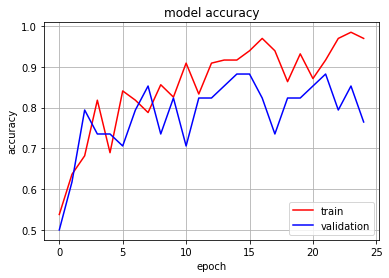

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

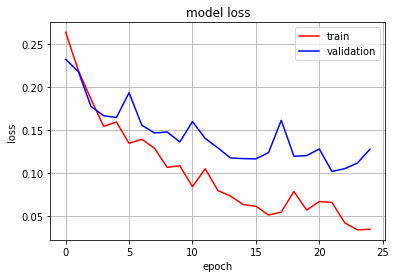

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)

In [ ]:
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.1225 - accuracy: 0.8333
Test Loss 0.1225123405456543
Test Accuracy 0.8333333134651184


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[22  5]
 [ 2 13]]


## Stochastic

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_55 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 12, batch_size = 1, validation_split = 0.2)

Epoch 1/12
132/132 [==============================] - 1s 5ms/step - loss: 0.7482 - accuracy: 0.5277 - val_loss: 0.7095 - val_accuracy: 0.5588
Epoch 2/12
132/132 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.6979 - val_loss: 0.5537 - val_accuracy: 0.7353
Epoch 3/12
132/132 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7951 - val_loss: 0.4683 - val_accuracy: 0.7647
Epoch 4/12
132/132 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8148 - val_loss: 0.6614 - val_accuracy: 0.6765
Epoch 5/12
132/132 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.8117 - val_loss: 0.4080 - val_accuracy: 0.8529
Epoch 6/12
132/132 [==============================] - 0s 3ms/step - loss: 0.3739 - accuracy: 0.8253 - val_loss: 0.4578 - val_accuracy: 0.8529
Epoch 7/12
132/132 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.8680 - val_loss: 0.5560 - val_accuracy: 0.8235
Epoch 

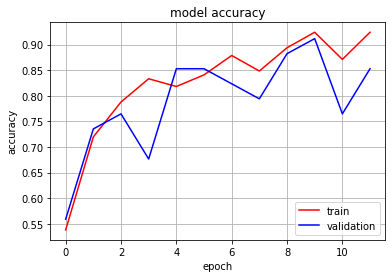

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

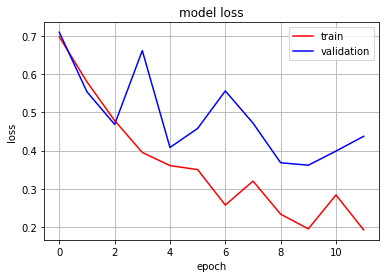

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 8ms/step - loss: 0.5335 - accuracy: 0.8333
Test Loss 0.5335174798965454
Test Accuracy 0.8333333134651184


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[21  6]
 [ 1 14]]


## Batch Size = 64

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 40, batch_size = 64, validation_split = 0.2)

Epoch 1/40
3/3 [==============================] - 1s 154ms/step - loss: 0.7325 - accuracy: 0.4480 - val_loss: 0.6743 - val_accuracy: 0.4706
Epoch 2/40
3/3 [==============================] - 0s 23ms/step - loss: 0.6318 - accuracy: 0.5501 - val_loss: 0.5976 - val_accuracy: 0.7353
Epoch 3/40
3/3 [==============================] - 0s 24ms/step - loss: 0.5668 - accuracy: 0.8211 - val_loss: 0.5774 - val_accuracy: 0.6765
Epoch 4/40
3/3 [==============================] - 0s 23ms/step - loss: 0.5326 - accuracy: 0.7618 - val_loss: 0.6199 - val_accuracy: 0.6471
Epoch 5/40
3/3 [==============================] - 0s 21ms/step - loss: 0.5331 - accuracy: 0.6845 - val_loss: 0.5407 - val_accuracy: 0.7059
Epoch 6/40
3/3 [==============================] - 0s 21ms/step - loss: 0.4685 - accuracy: 0.8079 - val_loss: 0.5863 - val_accuracy: 0.6765
Epoch 7/40
3/3 [==============================] - 0s 22ms/step - loss: 0.4968 - accuracy: 0.7518 - val_loss: 0.5092 - val_accuracy: 0.7059
Epoch 8/40
3/3 [==========

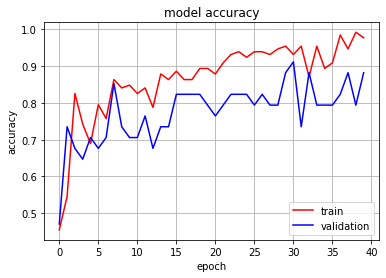

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

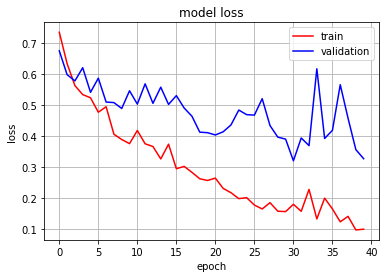

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 8ms/step - loss: 0.3546 - accuracy: 0.9048
Test Loss 0.3545846939086914
Test Accuracy 0.9047619104385376


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[24  3]
 [ 1 14]]


## Batch Size = 128

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_82 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_83 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 128, validation_split = 0.2)

Epoch 1/50
2/2 [==============================] - 1s 316ms/step - loss: 0.7057 - accuracy: 0.4261 - val_loss: 0.6405 - val_accuracy: 0.6471
Epoch 2/50
2/2 [==============================] - 0s 43ms/step - loss: 0.6322 - accuracy: 0.7270 - val_loss: 0.6353 - val_accuracy: 0.5294
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6438 - accuracy: 0.5433 - val_loss: 0.5922 - val_accuracy: 0.7059
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.5892 - accuracy: 0.7577 - val_loss: 0.5845 - val_accuracy: 0.6471
Epoch 5/50
2/2 [==============================] - 0s 37ms/step - loss: 0.5599 - accuracy: 0.7041 - val_loss: 0.6149 - val_accuracy: 0.6471
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.5650 - accuracy: 0.6684 - val_loss: 0.5651 - val_accuracy: 0.6471
Epoch 7/50
2/2 [==============================] - 0s 40ms/step - loss: 0.5057 - accuracy: 0.7321 - val_loss: 0.5791 - val_accuracy: 0.7353
Epoch 8/50
2/2 [==========

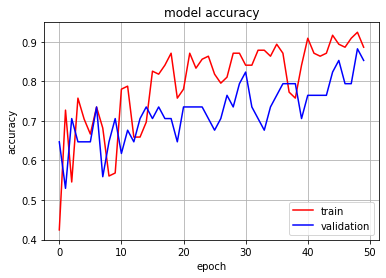

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

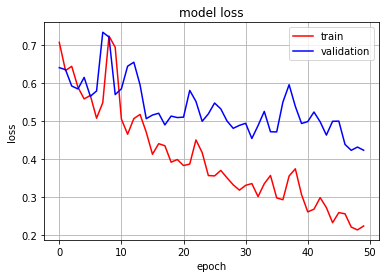

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 8ms/step - loss: 0.4068 - accuracy: 0.8333
Test Loss 0.4068201184272766
Test Accuracy 0.8333333134651184


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[23  4]
 [ 3 12]]


## Batch Size = 208

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_91 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_92 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 208, validation_split = 0.2)

Epoch 1/30
1/1 [==============================] - 1s 724ms/step - loss: 0.6976 - accuracy: 0.4545 - val_loss: 0.6719 - val_accuracy: 0.4706
Epoch 2/30
1/1 [==============================] - 0s 44ms/step - loss: 0.6557 - accuracy: 0.5227 - val_loss: 0.6278 - val_accuracy: 0.6471
Epoch 3/30
1/1 [==============================] - 0s 39ms/step - loss: 0.6088 - accuracy: 0.6894 - val_loss: 0.5967 - val_accuracy: 0.7647
Epoch 4/30
1/1 [==============================] - 0s 40ms/step - loss: 0.5766 - accuracy: 0.8106 - val_loss: 0.5732 - val_accuracy: 0.7647
Epoch 5/30
1/1 [==============================] - 0s 40ms/step - loss: 0.5436 - accuracy: 0.8409 - val_loss: 0.5533 - val_accuracy: 0.7941
Epoch 6/30
1/1 [==============================] - 0s 43ms/step - loss: 0.5095 - accuracy: 0.7803 - val_loss: 0.5394 - val_accuracy: 0.7353
Epoch 7/30
1/1 [==============================] - 0s 42ms/step - loss: 0.4832 - accuracy: 0.7424 - val_loss: 0.5191 - val_accuracy: 0.7647
Epoch 8/30
1/1 [==========

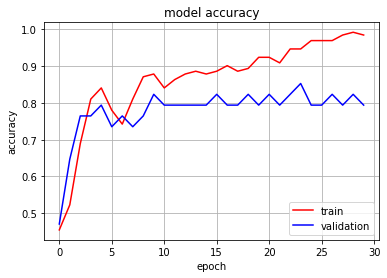

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

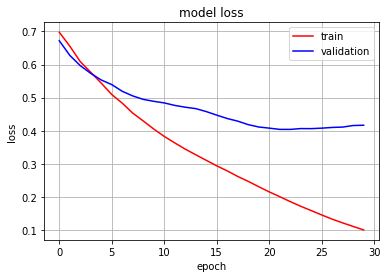

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.4009 - accuracy: 0.8810
Test Loss 0.4008658826351166
Test Accuracy 0.8809523582458496


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[23  4]
 [ 1 14]]


## Tanh as Activation Function

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'tanh', input_shape = (60,)))
model.add(Dense(512, activation = 'tanh'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 25, batch_size = 208, validation_split = 0.2)

Epoch 1/25
1/1 [==============================] - 1s 526ms/step - loss: 0.6977 - accuracy: 0.4773 - val_loss: 1.1756 - val_accuracy: 0.4706
Epoch 2/25
1/1 [==============================] - 0s 33ms/step - loss: 1.1025 - accuracy: 0.5152 - val_loss: 0.5883 - val_accuracy: 0.7353
Epoch 3/25
1/1 [==============================] - 0s 37ms/step - loss: 0.5761 - accuracy: 0.6515 - val_loss: 0.8273 - val_accuracy: 0.5294
Epoch 4/25
1/1 [==============================] - 0s 33ms/step - loss: 0.8535 - accuracy: 0.4848 - val_loss: 0.7265 - val_accuracy: 0.5000
Epoch 5/25
1/1 [==============================] - 0s 31ms/step - loss: 0.7381 - accuracy: 0.5379 - val_loss: 0.5382 - val_accuracy: 0.7647
Epoch 6/25
1/1 [==============================] - 0s 30ms/step - loss: 0.5248 - accuracy: 0.7879 - val_loss: 0.5900 - val_accuracy: 0.6471
Epoch 7/25
1/1 [==============================] - 0s 30ms/step - loss: 0.5517 - accuracy: 0.6364 - val_loss: 0.6887 - val_accuracy: 0.5882
Epoch 8/25
1/1 [==========

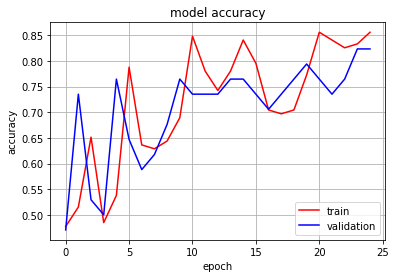

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

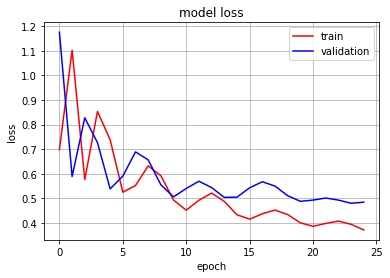

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 4ms/step - loss: 0.4492 - accuracy: 0.7857
Test Loss 0.4491579532623291
Test Accuracy 0.7857142686843872


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[22  5]
 [ 4 11]]


## Sigmoid as Activation Function

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'sigmoid', input_shape = (60,)))
model.add(Dense(512, activation = 'sigmoid'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 1026      
Total params: 294,914
Trainable params: 294,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 120, batch_size = 208, validation_split = 0.2)

Epoch 1/120
1/1 [==============================] - 1s 533ms/step - loss: 0.9438 - accuracy: 0.4848 - val_loss: 0.9392 - val_accuracy: 0.4706
Epoch 2/120
1/1 [==============================] - 0s 34ms/step - loss: 0.8797 - accuracy: 0.5152 - val_loss: 0.9591 - val_accuracy: 0.4706
Epoch 3/120
1/1 [==============================] - 0s 34ms/step - loss: 0.8968 - accuracy: 0.5152 - val_loss: 0.7329 - val_accuracy: 0.4706
Epoch 4/120
1/1 [==============================] - 0s 32ms/step - loss: 0.7114 - accuracy: 0.5152 - val_loss: 0.7112 - val_accuracy: 0.5294
Epoch 5/120
1/1 [==============================] - 0s 31ms/step - loss: 0.7363 - accuracy: 0.4848 - val_loss: 0.7777 - val_accuracy: 0.5294
Epoch 6/120
1/1 [==============================] - 0s 32ms/step - loss: 0.8220 - accuracy: 0.4848 - val_loss: 0.7357 - val_accuracy: 0.5294
Epoch 7/120
1/1 [==============================] - 0s 36ms/step - loss: 0.7695 - accuracy: 0.4848 - val_loss: 0.6855 - val_accuracy: 0.5294
Epoch 8/120
1/1 [==

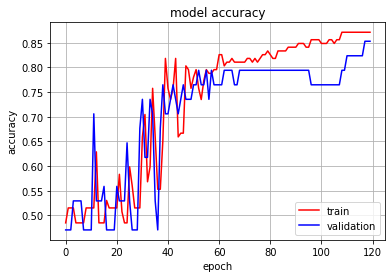

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

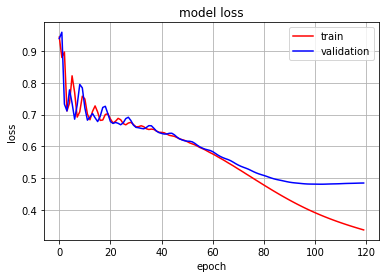

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.4962 - accuracy: 0.7619
Test Loss 0.49619337916374207
Test Accuracy 0.761904776096344


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[21  6]
 [ 4 11]]


## Four Hidden Layer

In [ ]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (60,)))
model.add(Dense(450, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 200)               12200     
_________________________________________________________________
dense_67 (Dense)             (None, 450)               90450     
_________________________________________________________________
dense_68 (Dense)             (None, 400)               180400    
_________________________________________________________________
dense_69 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_70 (Dense)             (None, 2)                 202       
Total params: 323,352
Trainable params: 323,352
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 32, validation_split = 0.2)

Epoch 1/30
5/5 [==============================] - 1s 58ms/step - loss: 0.7097 - accuracy: 0.4831 - val_loss: 0.6449 - val_accuracy: 0.6471
Epoch 2/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6422 - accuracy: 0.6768 - val_loss: 0.6004 - val_accuracy: 0.7353
Epoch 3/30
5/5 [==============================] - 0s 10ms/step - loss: 0.5761 - accuracy: 0.7985 - val_loss: 0.5590 - val_accuracy: 0.7647
Epoch 4/30
5/5 [==============================] - 0s 10ms/step - loss: 0.4925 - accuracy: 0.8299 - val_loss: 0.5455 - val_accuracy: 0.7353
Epoch 5/30
5/5 [==============================] - 0s 11ms/step - loss: 0.4408 - accuracy: 0.8331 - val_loss: 0.5062 - val_accuracy: 0.7059
Epoch 6/30
5/5 [==============================] - 0s 11ms/step - loss: 0.4169 - accuracy: 0.8342 - val_loss: 0.5478 - val_accuracy: 0.7647
Epoch 7/30
5/5 [==============================] - 0s 11ms/step - loss: 0.3515 - accuracy: 0.8072 - val_loss: 0.4697 - val_accuracy: 0.7353
Epoch 8/30
5/5 [===========

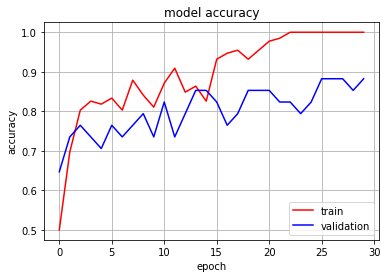

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

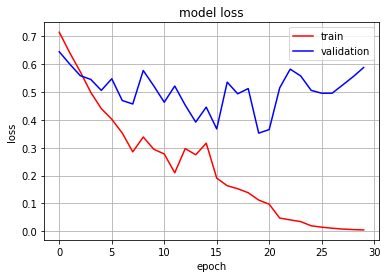

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.3305 - accuracy: 0.8810
Test Loss 0.33054348826408386
Test Accuracy 0.8809523582458496


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[22  5]
 [ 1 14]]


## Six Hidden Layer

In [ ]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (60,)))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(800, activation = 'relu'))
model.add(Dense(900, activation = 'relu'))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 200)               12200     
_________________________________________________________________
dense_86 (Dense)             (None, 500)               100500    
_________________________________________________________________
dense_87 (Dense)             (None, 800)               400800    
_________________________________________________________________
dense_88 (Dense)             (None, 900)               720900    
_________________________________________________________________
dense_89 (Dense)             (None, 300)               270300    
_________________________________________________________________
dense_90 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_91 (Dense)             (None, 2)               

In [ ]:
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

Epoch 1/20
5/5 [==============================] - 1s 66ms/step - loss: 0.6954 - accuracy: 0.4856 - val_loss: 0.6724 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.6452 - accuracy: 0.6222 - val_loss: 0.6752 - val_accuracy: 0.5588
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.6994 - accuracy: 0.5528 - val_loss: 0.6356 - val_accuracy: 0.6471
Epoch 4/20
5/5 [==============================] - 0s 12ms/step - loss: 0.5662 - accuracy: 0.7785 - val_loss: 0.7158 - val_accuracy: 0.5588
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 0.5514 - accuracy: 0.6867 - val_loss: 0.5273 - val_accuracy: 0.6765
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.3917 - accuracy: 0.8602 - val_loss: 0.5136 - val_accuracy: 0.7647
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.3482 - accuracy: 0.8398 - val_loss: 0.5696 - val_accuracy: 0.7353
Epoch 8/20
5/5 [===========

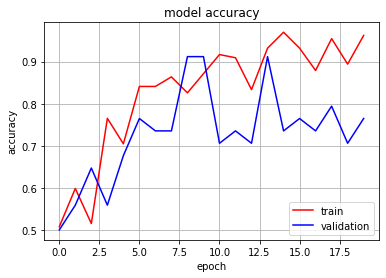

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

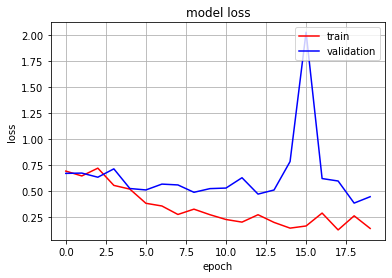

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.4949 - accuracy: 0.8333
Test Loss 0.49493181705474854
Test Accuracy 0.8333333134651184


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[21  6]
 [ 1 14]]


## Fewer Layers

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (60,)))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 512)               31232     
_________________________________________________________________
dense_95 (Dense)             (None, 2)                 1026      
Total params: 32,258
Trainable params: 32,258
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 32, validation_split = 0.2)

Epoch 1/30
5/5 [==============================] - 1s 58ms/step - loss: 0.6761 - accuracy: 0.5745 - val_loss: 0.6571 - val_accuracy: 0.5882
Epoch 2/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6191 - accuracy: 0.6483 - val_loss: 0.6307 - val_accuracy: 0.6176
Epoch 3/30
5/5 [==============================] - 0s 9ms/step - loss: 0.5728 - accuracy: 0.7564 - val_loss: 0.5990 - val_accuracy: 0.7059
Epoch 4/30
5/5 [==============================] - 0s 11ms/step - loss: 0.5653 - accuracy: 0.7781 - val_loss: 0.5669 - val_accuracy: 0.7353
Epoch 5/30
5/5 [==============================] - 0s 9ms/step - loss: 0.5054 - accuracy: 0.8242 - val_loss: 0.5508 - val_accuracy: 0.7941
Epoch 6/30
5/5 [==============================] - 0s 10ms/step - loss: 0.4906 - accuracy: 0.7934 - val_loss: 0.5289 - val_accuracy: 0.8529
Epoch 7/30
5/5 [==============================] - 0s 10ms/step - loss: 0.4766 - accuracy: 0.7843 - val_loss: 0.5276 - val_accuracy: 0.7941
Epoch 8/30
5/5 [=============

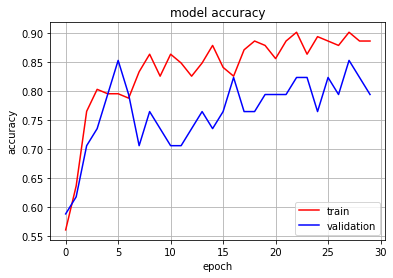

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

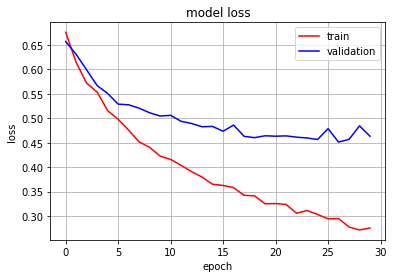

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.4144 - accuracy: 0.7857
Test Loss 0.4144379794597626
Test Accuracy 0.7857142686843872


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[21  6]
 [ 3 12]]


## Fewer Neurons

In [ ]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (60,)))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 200)               12200     
_________________________________________________________________
dense_97 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_98 (Dense)             (None, 2)                 602       
Total params: 73,102
Trainable params: 73,102
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 32, validation_split = 0.2)

Epoch 1/30
5/5 [==============================] - 1s 60ms/step - loss: 0.6933 - accuracy: 0.5230 - val_loss: 0.6507 - val_accuracy: 0.5588
Epoch 2/30
5/5 [==============================] - 0s 9ms/step - loss: 0.5961 - accuracy: 0.6669 - val_loss: 0.6054 - val_accuracy: 0.7059
Epoch 3/30
5/5 [==============================] - 0s 9ms/step - loss: 0.5799 - accuracy: 0.7648 - val_loss: 0.5731 - val_accuracy: 0.7059
Epoch 4/30
5/5 [==============================] - 0s 10ms/step - loss: 0.5098 - accuracy: 0.8057 - val_loss: 0.5654 - val_accuracy: 0.7059
Epoch 5/30
5/5 [==============================] - 0s 10ms/step - loss: 0.4862 - accuracy: 0.7544 - val_loss: 0.5109 - val_accuracy: 0.7353
Epoch 6/30
5/5 [==============================] - 0s 12ms/step - loss: 0.4621 - accuracy: 0.8000 - val_loss: 0.4888 - val_accuracy: 0.7353
Epoch 7/30
5/5 [==============================] - 0s 10ms/step - loss: 0.4011 - accuracy: 0.8331 - val_loss: 0.4858 - val_accuracy: 0.7647
Epoch 8/30
5/5 [=============

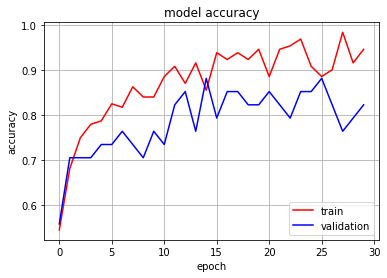

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

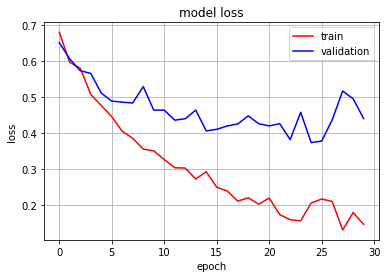

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.3190 - accuracy: 0.8333
Test Loss 0.31898561120033264
Test Accuracy 0.8333333134651184


In [ ]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[24  3]
 [ 4 11]]
